<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Definição" data-toc-modified-id="Definição-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Definição</a></span><ul class="toc-item"><li><span><a href="#Metricas-de-qualidade-da-predição" data-toc-modified-id="Metricas-de-qualidade-da-predição-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Metricas de qualidade da predição</a></span><ul class="toc-item"><li><span><a href="#Refs:" data-toc-modified-id="Refs:-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Refs:</a></span></li></ul></li></ul></li><li><span><a href="#Mover,-Suavizar,-Avaliar" data-toc-modified-id="Mover,-Suavizar,-Avaliar-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Mover, Suavizar, Avaliar</a></span><ul class="toc-item"><li><span><a href="#Suavização-Exponencial" data-toc-modified-id="Suavização-Exponencial-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Suavização Exponencial</a></span></li><li><span><a href="#Suavização-exponencial-dupla" data-toc-modified-id="Suavização-exponencial-dupla-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Suavização exponencial dupla</a></span></li><li><span><a href="#Triple-exponential-smoothing-a.k.a.-Holt-Winters" data-toc-modified-id="Triple-exponential-smoothing-a.k.a.-Holt-Winters-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Triple exponential smoothing a.k.a. Holt-Winters</a></span></li><li><span><a href="#Time-series-cross-validation" data-toc-modified-id="Time-series-cross-validation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Time series cross validation</a></span></li></ul></li><li><span><a href="#Econometric-approach" data-toc-modified-id="Econometric-approach-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Econometric approach</a></span><ul class="toc-item"><li><span><a href="#Getting-rid-of-non-stationarity-and-building-SARIMA" data-toc-modified-id="Getting-rid-of-non-stationarity-and-building-SARIMA-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Getting rid of non-stationarity and building SARIMA</a></span></li><li><span><a href="#ARIMA-family-Crash-Course" data-toc-modified-id="ARIMA-family-Crash-Course-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>ARIMA-family Crash-Course</a></span><ul class="toc-item"><li><span><a href="#Multiple-Cross-Validation" data-toc-modified-id="Multiple-Cross-Validation-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Multiple Cross Validation</a></span><ul class="toc-item"><li><span><a href="#Usando--Cross-Validation" data-toc-modified-id="Usando--Cross-Validation-3.2.1.1"><span class="toc-item-num">3.2.1.1&nbsp;&nbsp;</span>Usando  Cross Validation</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Linear-(and-not-quite)-models-on-time-series" data-toc-modified-id="Linear-(and-not-quite)-models-on-time-series-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Linear (and not quite) models on time series</a></span><ul class="toc-item"><li><span><a href="#Feature-exctraction" data-toc-modified-id="Feature-exctraction-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Feature exctraction</a></span></li><li><span><a href="#Lags-of-time-series" data-toc-modified-id="Lags-of-time-series-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Lags of time series</a></span></li><li><span><a href="#Target-encoding" data-toc-modified-id="Target-encoding-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Target encoding</a></span></li><li><span><a href="#Regularization-and-feature-selection" data-toc-modified-id="Regularization-and-feature-selection-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Regularization and feature selection</a></span></li></ul></li><li><span><a href="#Boosting" data-toc-modified-id="Boosting-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Boosting</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Definição

Series temporais é uma serie de pontos indexados em ordem temporal


In [51]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook



%matplotlib inline

In [52]:
ads = pd.read_csv('data/ads.csv', index_col=['Time'], parse_dates=['Time'])
currency = pd.read_csv('data/currency.csv', index_col=['Time'], parse_dates=['Time'])

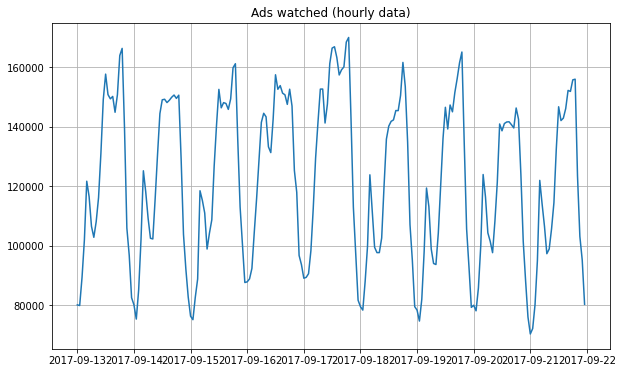

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(ads.Ads)
plt.title('Ads watched (hourly data)')
plt.grid(True)
plt.show()

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(currency.GEMS_GEMS_SPENT)
plt.title('In-game currency spent (daily data)')
plt.grid(True)
plt.show()

## Metricas de qualidade da predição

- [R squared](http://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination): coeficiente de determinação (em econometria, pode ser interpretado como a porcentagem de variância explicada pelo modelo), $(-\infty, 1]$

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$ 

```python
sklearn.metrics.r2_score
```
---
- [Mean Absolute Error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error): this is an interpretable metric because it has the same unit of measurment as the initial series, $[0, +\infty)$
 



$MAE = \frac{\sum\limits_{i=1}^{n} |y_i - \hat{y}_i|}{n}$ 

```python
sklearn.metrics.mean_absolute_error
```
---
- [Median Absolute Error](http://scikit-learn.org/stable/modules/model_evaluation.html#median-absolute-error): again, an interpretable metric that is particularly interesting because it is robust to outliers, $[0, +\infty)$

$MedAE = median(|y_1 - \hat{y}_1|, ... , |y_n - \hat{y}_n|)$

```python
sklearn.metrics.median_absolute_error
```
---
- [Mean Squared Error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error): the most commonly used metric that gives a higher penalty to large errors and vice versa, $[0, +\infty)$
** Esta função calcula a média dos erros do modelo ao quadrado. Ou seja, diferenças menores têm menos importância, enquanto diferenças maiores recebem mais peso

$MSE = \frac{1}{n}\sum\limits_{i=1}^{n} (y_i - \hat{y}_i)^2$

```python
sklearn.metrics.mean_squared_error
```
---
- [Mean Squared Logarithmic Error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-logarithmic-error): practically, this is the same as MSE, but we take the logarithm of the series. As a result, we give more weight to small mistakes as well. This is usually used when the data has exponential trends, $[0, +\infty)$

$MSLE = \frac{1}{n}\sum\limits_{i=1}^{n} (log(1+y_i) - log(1+\hat{y}_i))^2$

```python
sklearn.metrics.mean_squared_log_error
```
---
- Mean Absolute Percentage Error: this is the same as MAE but is computed as a percentage, which is very convenient when you want to explain the quality of the model to management, $[0, +\infty)$ 
 * Este erro calcula a média percentual do desvio absoluto entre as previsões e a realidade. É utilizado para avaliar sistemas de previsões de vendas e outros sistemas nos quais a diferença percentual seja mais interpretável, ou mais importante, do que os valores absolutos. Expressa a acurácia do erro em percentagem. Por exemplo, se temos um MAPE de 7%, quer dizer que o nosso ajuste esta errado em 7% dos dados. 



$MAPE = \frac{100}{n}\sum\limits_{i=1}^{n} \frac{|y_i - \hat{y}_i|}{y_i}$ 

```python
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```

### Refs:
http://www.portalaction.com.br/series-temporais/35-medidas-de-acuracia

In [55]:
# Importing everything from above

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

* Agora que sabemos como medir a qualidade das predições, vamos ver quais metricas podemos usar e como traduzir estes resultados para o chefe. Depois disso, mais um pequeno detalhe - a construção do modelo




# Mover, Suavizar, Avaliar

* Vamos começar com uma hipotese simples, "amanhã será o mesmo que hoje". No entanto, ao invés de um modelo como  y^t=yt−1  ( que é na verdade um ótimo baseline para predição de series temporais e algumas vezes é impossivel superar), iremos assumir que o o valor futuro de nossas variávis depende da media de k valores anteriores. POrtanto, usaremos média movel.

In [56]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

moving_average(ads, 24) # prediction for the last observed day (past 24 hours)

116805.0

* Infelizmente, não podemos fazer predições para um futuro distante -- para obter o valor do proximo ponto, precisamos que valores anteriores sejam observados. Mas médias moveis tem outro uso -- suavizar a serie original para identificar tendencias. Pandas tem uma implementação disponivel DataFrame.rolling(window).mean().Quanto maior a janela, mais suave a tendência. No caso de dados muito ruidosos, geralmente encontrados em finanças, esse procedimento pode ajudar a detectar padrões comuns.

In [57]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:]) 
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

Vamos suavizar as ultimas 4 horas

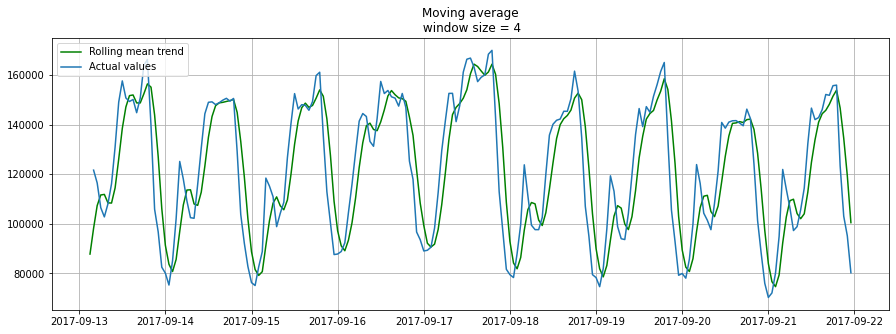

In [58]:
plotMovingAverage(ads, 4) 

Agora vamos testar a suavização para às ultimas 12 horas

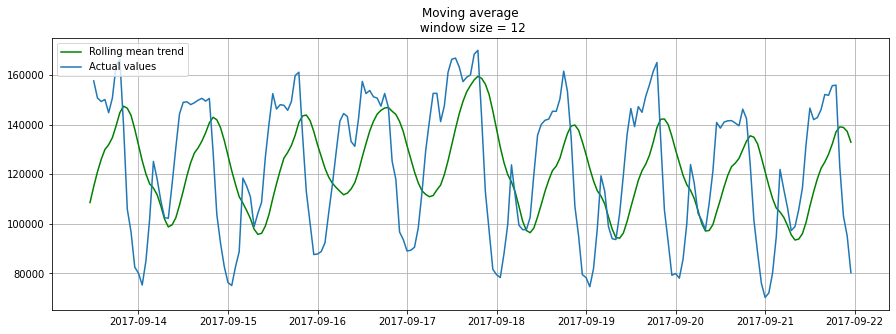

In [59]:
plotMovingAverage(ads, 12)


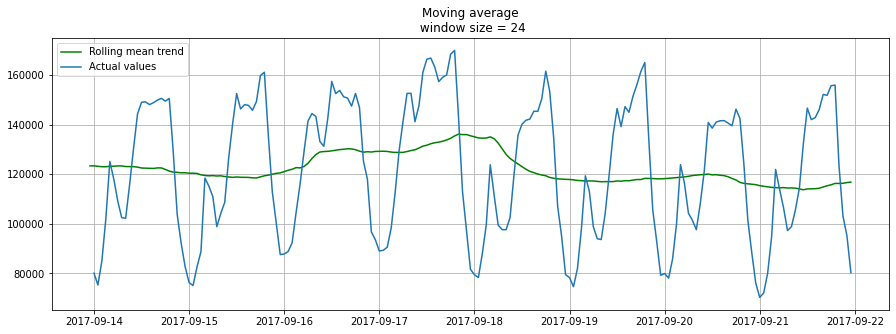

In [60]:
plotMovingAverage(ads, 24)

Quando aplicamos a suavização diaria nos dados 'horarios', podemos claramente ver a dinânica dos ADS assistidos. Durante os finais de semana, os valores são altos (mais tempo para jogar durante os fds) enquanto poucos ADS são vistos durante os dias de semana.

Podemos plotar os intervalos de confianção para os valores suavizados. O intervalo de confiança é calculado utilizando a metrica MAE. (media_movel + (mae  * desvio)


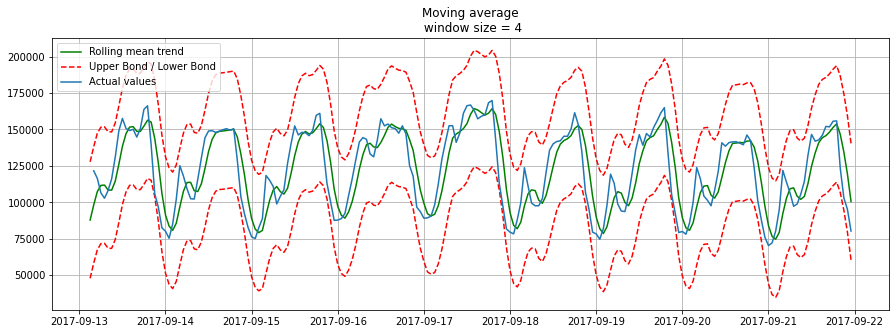

In [61]:
plotMovingAverage(ads, 4, plot_intervals=True)

Agora, vamos criar um simples sistema de detecção de anomalia com a ajuda das médias moveis. Infelizmente, nestes dados em particular, tudo é mais ou menos normal, então intencionalemnte faremos um desses valores serem anormais em nosso dataframe ads_anomaly.

In [62]:
ads_anomaly = ads.copy()
ads_anomaly.iloc[-20] = ads_anomaly.iloc[-20] * 0.2 # say we have 80% drop of ads 

Vamos ver se este simples metódo pode identificar anomalias:


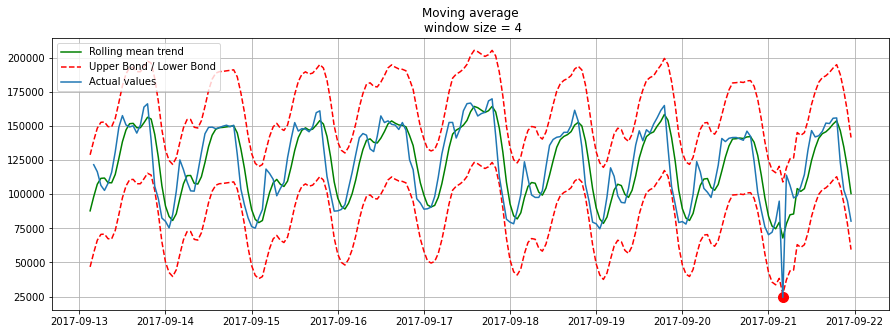

In [63]:
plotMovingAverage(ads_anomaly, 4, plot_intervals=True, plot_anomalies=True)

Sucesso! E a outra série?


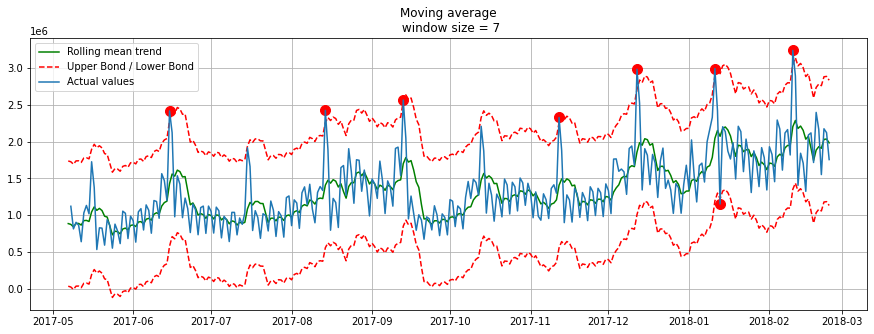

In [64]:
plotMovingAverage(currency, 7, plot_intervals=True, plot_anomalies=True) # weekly smoothing

Ixe, isso não é bom! Aqui, podemos ver os pontos negativos da nossa abordagem -- ele não captura a sazonalidade mensal de nossos dados e marca os picos de 30 dias como anomalias. Se você quer evitar falsos positivos, é melhor considerar modelos mais complexos.

Média ponderada é uma modificação simples das médias moveis. Os pesos somam 1 com pesos maiores associados a observaçẽos mais recentes.


y^t=∑n=1kωnyt+1−n

In [65]:
def weighted_average(series, weights):
    """
        Calculate weighter average on series
    """
    result = 0.0
    weights.reverse()
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)

In [66]:
weighted_average(ads, [0.6, 0.3, 0.1])

98423.0

## Suavização Exponencial


Agora, vamos ver o que acontece se, ao inves de pesar apenas os ultimos k valores da nossa serie, começarmos pesando todas as observações disponiveis enquanto exponencialmente decrescemos o pesos enquanto movemos de volta no tempo. Existe uma formula para suavização exponencial que ira nos ajudar:

y^t=α⋅yt+(1−α)⋅y^t−1

Aqui, o valor do modelo é uma média ponderada entre o valor verdadeiro atual e os valores anteriores do modelo.  O peso alfa é chamado fator de suavização. Ele define quao rapidamente iremos esquecer a ultima observação. QUnato menor o alfa, mais influencia as observações anteriores tem e a maior a suavização da serie.

Exponentiality is hidden in the recursiveness of the function -- we multiply by  (1−α)  each time, which already contains a multiplication by  (1−α)  of previous model values.

In [67]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [68]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

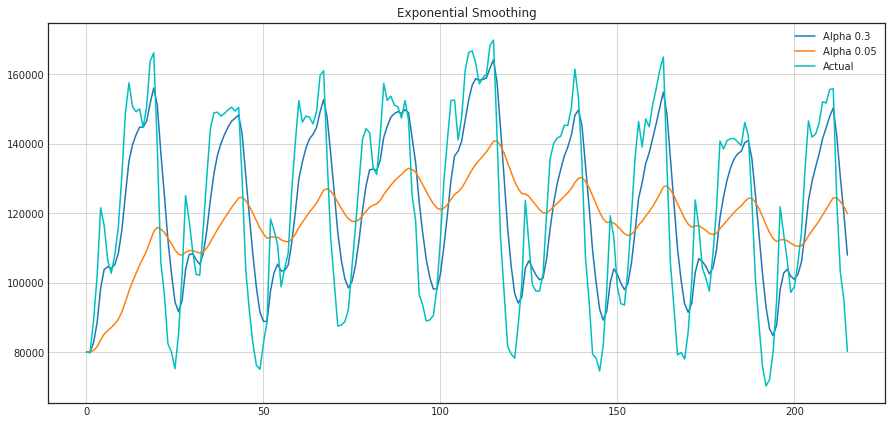

In [69]:
plotExponentialSmoothing(ads.Ads, [0.3, 0.05])


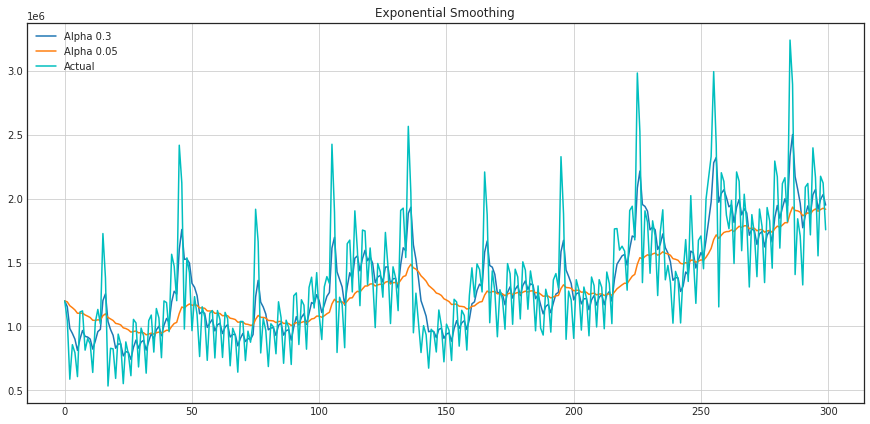

In [70]:
plotExponentialSmoothing(currency.GEMS_GEMS_SPENT, [0.3, 0.05])

## Suavização exponencial dupla

Até agora, os metodos discutivos fazem predição apenas para um ponto no futuro (como uma suavização). Isso é legal, mas não é o suficiente. Vamos estender a suavização exponencia e entaão poderemos predizer dois pontos no futuro(claro, também incluiremos mais suavização).

A decomposição das series irá nos ajudar -- vamos obter dois componentes: intercepto(i.e. level)  ℓ  e inclinação (i.e. trend)  b. Nśo aprendemos a predizer o intercepto (ou o valor esperado da serie) como nossos metodos anteriores; agora, vamos aplicar a mesma suavização exponencial para a tendencia assumindo que a mudança direção futura da serie depende das alterações ponderadas anteriores. Como resultado, obtemos o seguinte conjunto de funções:

ℓx=αyx+(1−α)(ℓx−1+bx−1)
 
bx=β(ℓx−ℓx−1)+(1−β)bx−1
 
y^x+1=ℓx+bx

The first one describes the intercept, which, as before, depends on the current value of the series. The second term is now split into previous values of the level and of the trend. The second function describes the trend, which depends on the level changes at the current step and on the previous value of the trend. In this case, the  β  coefficient is a weight for exponential smoothing. The final prediction is the sum of the model values of the intercept and trend.

In [71]:
 def double_exponential_smoothing(series, alpha, beta):

    """
        series - dataset with timeseries
        alpha - float [0.0, 1.0], smoothing parameter for level
        beta - float [0.0, 1.0], smoothing parameter for trend
    """
    # first value is same as series
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

def plotDoubleExponentialSmoothing(series, alphas, betas):
    """
        Plots double exponential smoothing with different alphas and betas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters for level
        betas - list of floats, smoothing parameters for trend
    """
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        for alpha in alphas:
            for beta in betas:
                plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(series.values, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

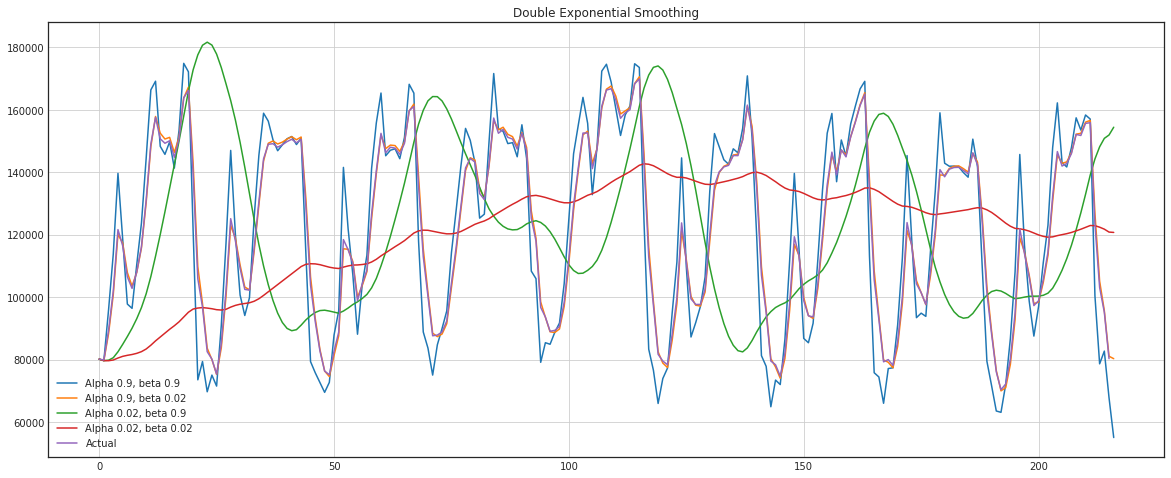

In [72]:
plotDoubleExponentialSmoothing(ads.Ads, alphas=[0.9, 0.02], betas=[0.9, 0.02])

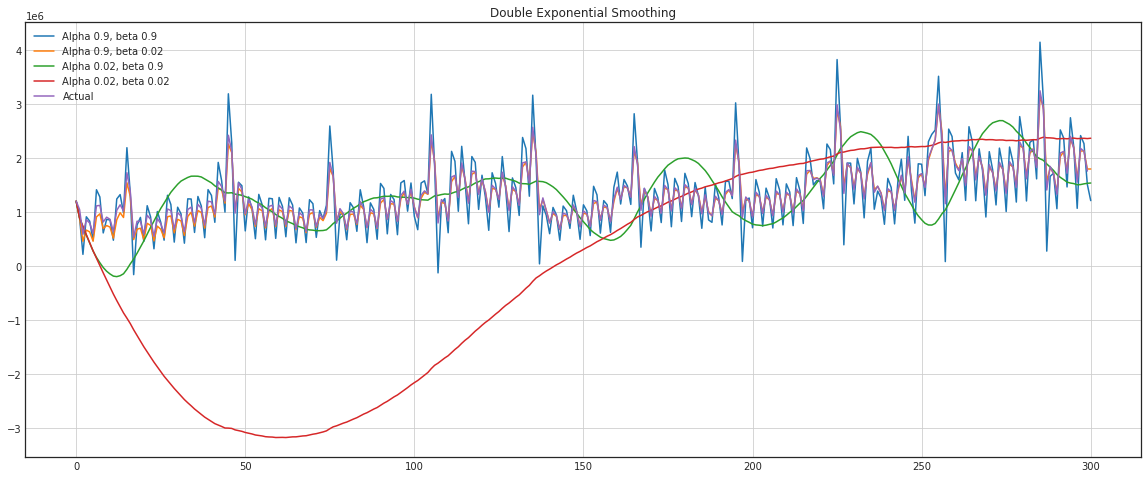

In [73]:
plotDoubleExponentialSmoothing(currency.GEMS_GEMS_SPENT, alphas=[0.9, 0.02], betas=[0.9, 0.02])


Now we have to tune two parameters:  α  and  β . The former is responsible for the series smoothing around the trend, the latter for the smoothing of the trend itself. The larger the values, the more weight the most recent observations will have and the less smoothed the model series will be. Certain combinations of the parameters may produce strange results, especially if set manually. We'll look into choosing parameters automatically in a bit; before that, let's discuss triple exponential smoothing.

## Triple exponential smoothing a.k.a. Holt-Winters


We've looked at exponential smoothing and double exponential smoothing. This time, we're going into triple exponential smoothing.

As you could have guessed, the idea is to add a third component - seasonality. This means that we should not use this method if our time series is not expected to have seasonality. Seasonal components in the model will explain repeated variations around intercept and trend, and it will be specified by the length of the season, in other words by the period after which the variations repeat. For each observation in the season, there is a separate component; for example, if the length of the season is 7 days (a weekly seasonality), we will have 7 seasonal components, one for each day of the week.

With this, let's write out a new system of equations:

ℓx=α(yx−sx−L)+(1−α)(ℓx−1+bx−1)
 
bx=β(ℓx−ℓx−1)+(1−β)bx−1
 
sx=γ(yx−ℓx)+(1−γ)sx−L
 
y^x+m=ℓx+mbx+sx−L+1+(m−1)modL

The intercept now depends on the current value of the series minus any corresponding seasonal component. Trend remains unchanged, and the seasonal component depends on the current value of the series minus the intercept and on the previous value of the component. Take into account that the component is smoothed through all the available seasons; for example, if we have a Monday component, then it will only be averaged with other Mondays. You can read more on how averaging works and how the initial approximation of the trend and seasonal components is done here. Now that we have the seasonal component, we can predict not just one or two steps ahead but an arbitrary  m  future steps ahead, which is very encouraging.

Below is the code for a triple exponential smoothing model, which is also known by the last names of its creators, Charles Holt and his student Peter Winters. Additionally, the Brutlag method was included in the model to produce confidence intervals:

y^maxx=ℓx−1+bx−1+sx−T+m⋅dt−T
 
y^minx=ℓx−1+bx−1+sx−T−m⋅dt−T
 
dt=γ∣yt−y^t∣+(1−γ)dt−T,
 
where  T  is the length of the season,  d  is the predicted deviation. Other parameters were taken from triple exponential smoothing. You can read more about the method and its applicability to anomaly detection in time series here.

In [74]:
class HoltWinters:
    
    """
    Holt-Winters model with the anomalies detection using Brutlag method
    
    # series - initial time series
    # slen - length of a season
    # alpha, beta, gamma - Holt-Winters model coefficients
    # n_preds - predictions horizon
    # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)
    
    """
    
    
    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor
        
        
    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  
    
    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

          
    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []
        
        seasonals = self.initial_seasonal_components()
        
        for i in range(len(self.series)+self.n_preds):
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])
                
                self.PredictedDeviation.append(0)
                
                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                
                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                continue
                
            if i >= len(self.series): # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])
                
                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])
                     
            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i%self.slen])

## Time series cross validation

Before we start building a model, let's first discuss how to estimate model parameters automatically.

There is nothing unusual here; as always, we have to choose a loss function suitable for the task that will tell us how closely the model approximates the data. Then, using cross-validation, we will evaluate our chosen loss function for the given model parameters, calculate the gradient, adjust the model parameters, and so on, eventually descending to the global minimum.

You may be asking how to do cross-validation for time series because time series have this temporal structure and one cannot randomly mix values in a fold while preserving this structure. With randomization, all time dependencies between observations will be lost. This is why we will have to use a more tricky approach in optimizing the model parameters. I don't know if there's an official name to this, but on CrossValidated, where one can find all answers but the Answer to the Ultimate Question of Life, the Universe, and Everything, the proposed name for this method is "cross-validation on a rolling basis".

The idea is rather simple -- we train our model on a small segment of the time series from the beginning until some  t , make predictions for the next  t+n  steps, and calculate an error. Then, we expand our training sample to  t+n  value, make predictions from  t+n  until  t+2∗n , and continue moving our test segment of the time series until we hit the last available observation. As a result, we have as many folds as  n  will fit between the initial training sample and the last observation.

* figure cross validate'

Now, knowing how to set up cross-validation, we can find the optimal parameters for the Holt-Winters model. Recall that we have daily seasonality in ads, hence the slen=24 parameter.

In [75]:
from sklearn.model_selection import TimeSeriesSplit # you have everything done for you

def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=24):
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # errors array
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=3) 
    
    # iterating over folds, train model on each, forecast and calculate error
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

In the Holt-Winters model, as well as in the other models of exponential smoothing, there's a constraint on how large the smoothing parameters can be, each of them ranging from 0 to 1. Therefore, in order to minimize our loss function, we have to choose an algorithm that supports constraints on model parameters. In our case, we will use the truncated Newton conjugate gradient.

In [76]:
%%time
data = ads.Ads[:-20] # leave some data for testing

# initializing model parameters alpha, beta and gamma
x = [0, 0, 0] 

# Minimizing the loss function 
opt = minimize(timeseriesCVscore, x0=x, 
               args=(data, mean_squared_log_error), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
              )

# Take optimal values...
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

# ...and train the model with them, forecasting for the next 50 hours
model = HoltWinters(data, slen = 24, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 50, scaling_factor = 3)
model.triple_exponential_smoothing()

0.11681811415263998 0.002674202051183794 0.059665015439133884
CPU times: user 3.19 s, sys: 12 ms, total: 3.2 s
Wall time: 3.22 s


Let's add some code to render plots.



In [77]:
def plotHoltWinters(series, plot_intervals=False, plot_anomalies=False):
    """
        series - dataset with timeseries
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    
    plt.figure(figsize=(20, 10))
    plt.plot(model.result, label = "Model")
    plt.plot(series.values, label = "Actual")
    error = mean_absolute_percentage_error(series.values, model.result[:len(series)])
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    
    if plot_anomalies:
        anomalies = np.array([np.NaN]*len(series))
        anomalies[series.values<model.LowerBond[:len(series)]] = \
            series.values[series.values<model.LowerBond[:len(series)]]
        anomalies[series.values>model.UpperBond[:len(series)]] = \
            series.values[series.values>model.UpperBond[:len(series)]]
        plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    if plot_intervals:
        plt.plot(model.UpperBond, "r--", alpha=0.5, label = "Up/Low confidence")
        plt.plot(model.LowerBond, "r--", alpha=0.5)
        plt.fill_between(x=range(0,len(model.result)), y1=model.UpperBond, 
                         y2=model.LowerBond, alpha=0.2, color = "grey")    
        
    plt.vlines(len(series), ymin=min(model.LowerBond), ymax=max(model.UpperBond), linestyles='dashed')
    plt.axvspan(len(series)-20, len(model.result), alpha=0.3, color='lightgrey')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=13);


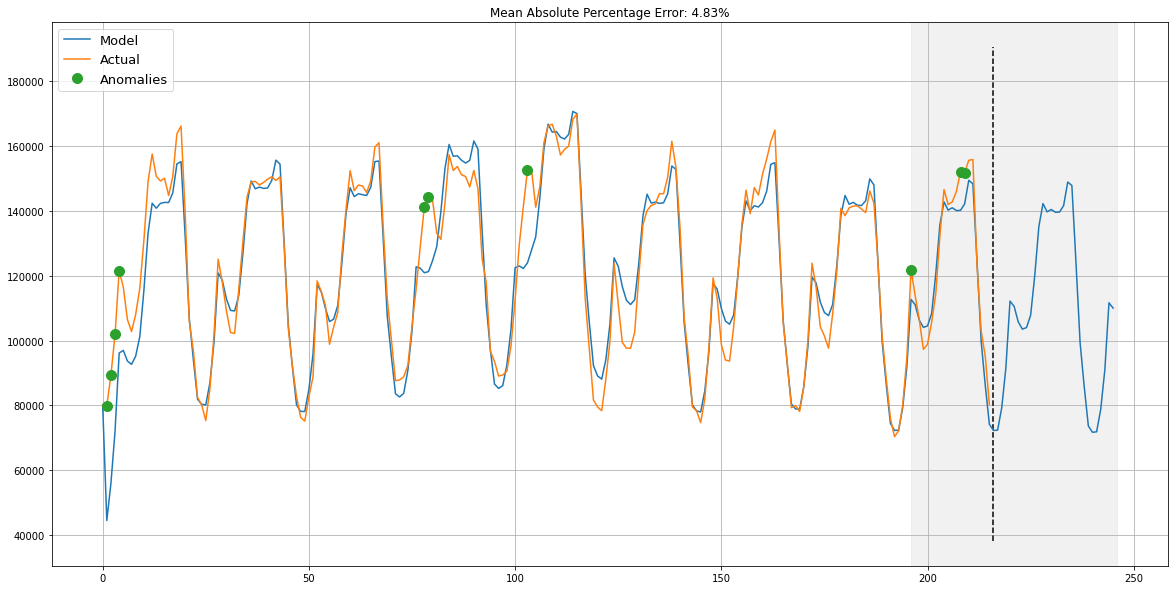

In [78]:
plotHoltWinters(ads.Ads, False, True)

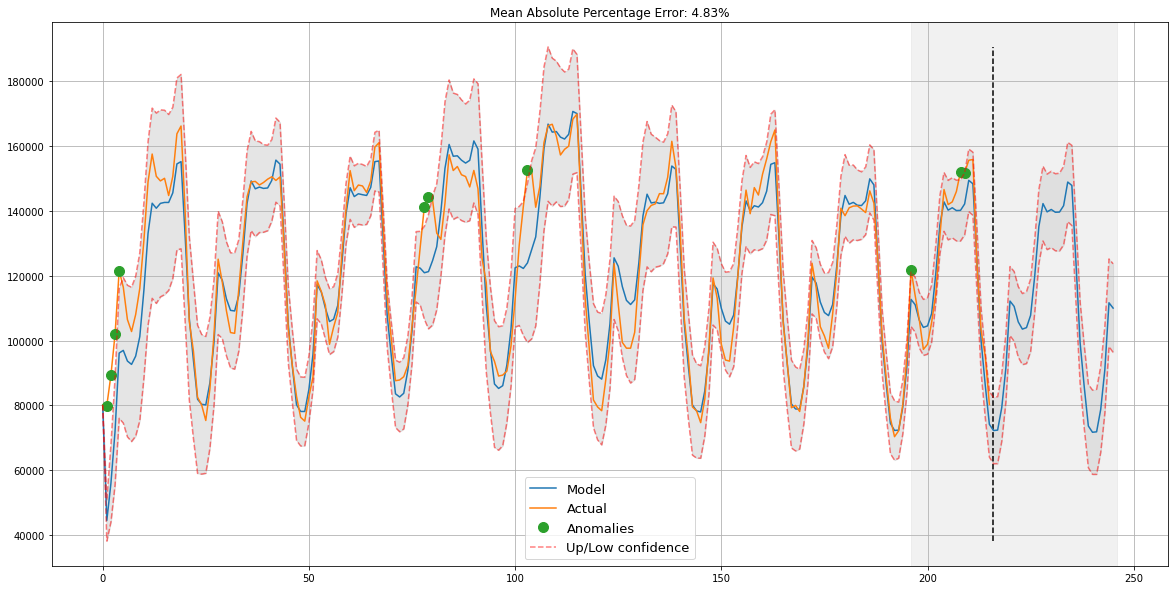

In [79]:
plotHoltWinters(ads.Ads, plot_intervals=True, plot_anomalies=True)


Judging by the plots, our model was able to successfully approximate the initial time series, capturing the daily seasonality, overall downwards trend, and even some anomalies. If you look at the model deviations, you can clearly see that the model reacts quite sharply to changes in the structure of the series but then quickly returns the deviation to the normal values, essentially "forgetting" the past. This feature of the model allows us to quickly build anomaly detection systems, even for noisy series data, without spending too much time and money on preparing the data and training the model.

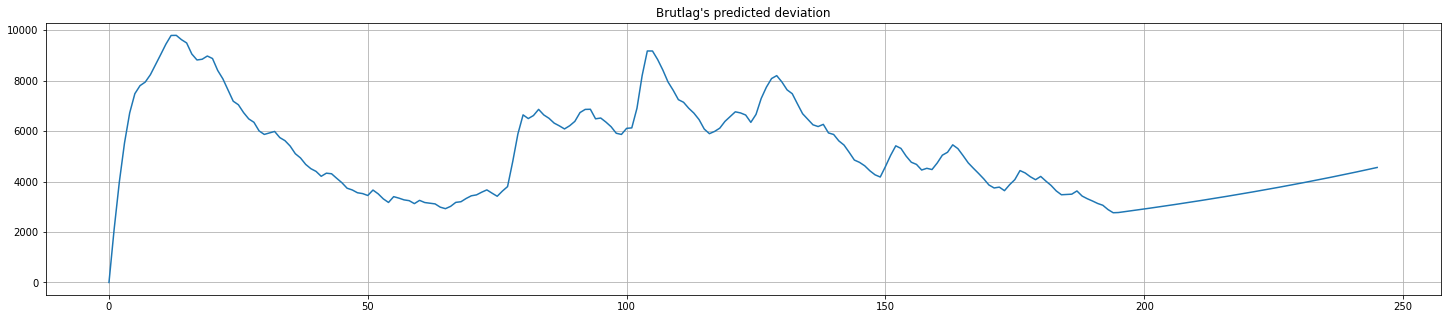

In [80]:
plt.figure(figsize=(25, 5))
plt.plot(model.PredictedDeviation)
plt.grid(True)
plt.axis('tight')
plt.title("Brutlag's predicted deviation");

We'll apply the same algorithm for the second series which, as you may recall, has trend and a 30-day seasonality.



In [81]:
data = currency.GEMS_GEMS_SPENT[:-50] 
slen = 30 # 30-day seasonality

x = [0, 0, 0] 

opt = minimize(timeseriesCVscore, x0=x, 
               args=(data, mean_absolute_percentage_error, slen), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
              )

alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

model = HoltWinters(data, slen = slen, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 100, scaling_factor = 3)
model.triple_exponential_smoothing()

0.012841445048055122 0.04883371471892228 0.00943678056045777


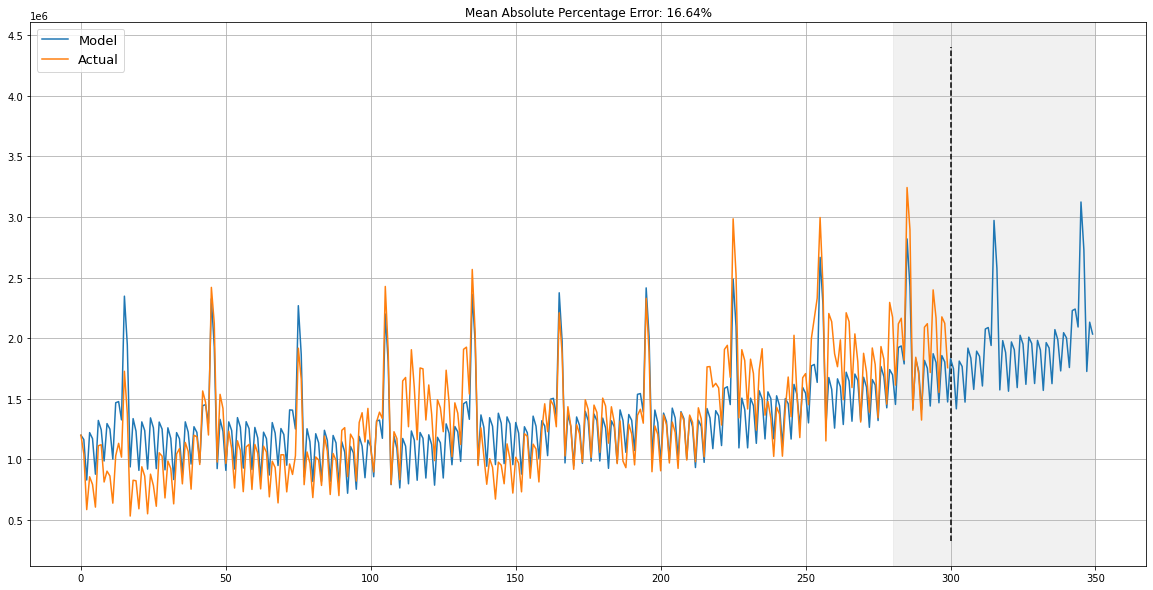

In [82]:
plotHoltWinters(currency.GEMS_GEMS_SPENT)


Looks good! The model caught both upwards trend and seasonal spikes and fits the data quite nicely.



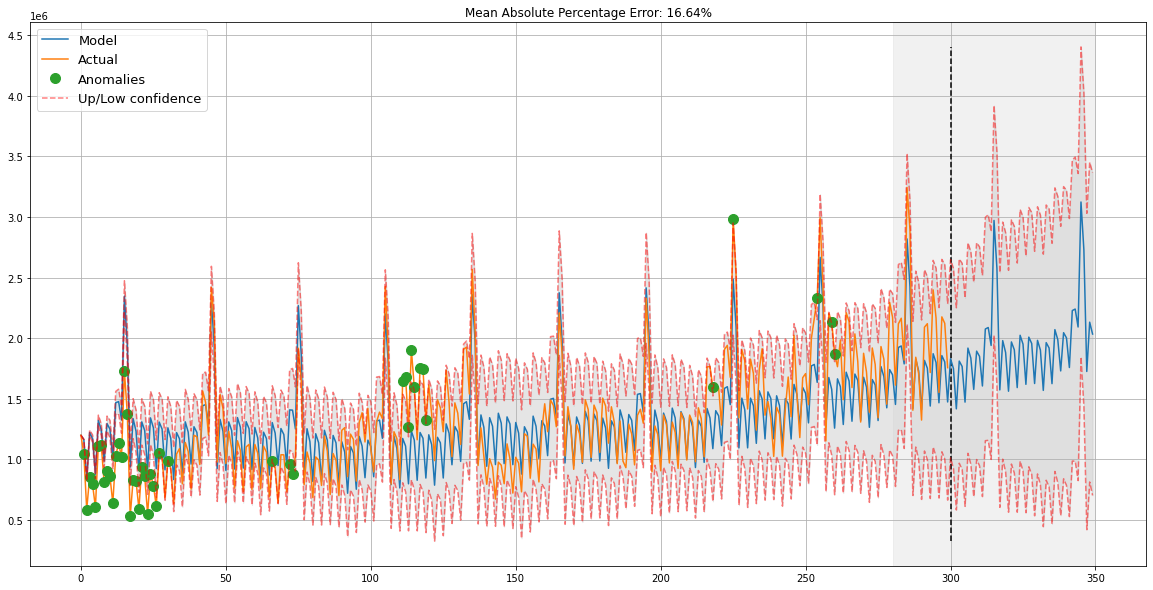

In [83]:
plotHoltWinters(currency.GEMS_GEMS_SPENT, plot_intervals=True, plot_anomalies=True)

In [84]:
plt.figure(figsize=(20, 5))
plt.plot(model.PredictedDeviation)
plt.grid(True)
plt.axis('tight')
plt.title("Brutlag's predicted deviation");

# Econometric approach


**Stationarity**

Before we start modeling, we should mention such an important property of time series: stationarity.

If a process is stationary, that means it does not change its statistical properties over time, namely its mean and variance. (The constancy of variance is called homoscedasticity)The covariance function does not depend on time; it should only depend on the distance between observations. You can see this visually on the images in the post by Sean Abu:

The red graph below is not stationary because the mean increases over time.

* figures

So why is stationarity so important? Because it is easy to make predictions on a stationary series since we can assume that the future statistical properties will not be different from those currently observed. Most of the time-series models, in one way or the other, try to predict those properties (mean or variance, for example). Furture predictions would be wrong if the original series were not stationary. Unfortunately, most of the time series that we see outside of textbooks are non-stationary, but we can (and should) change this.

So, in order to combat non-stationarity, we have to know our enemy, so to speak. Let's see how we can detect it. We will look at white noise and random walks to learn how to get from one to another for free.

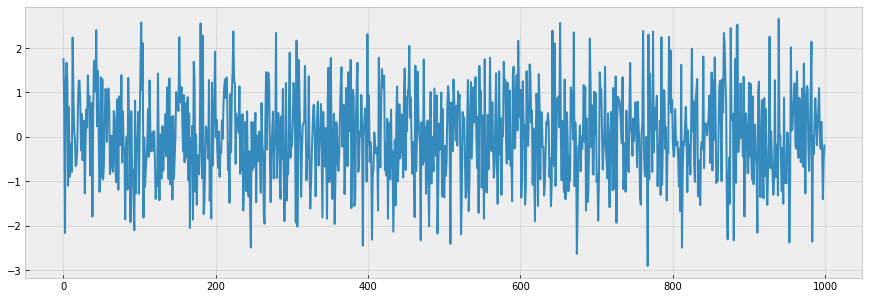

In [85]:
white_noise = np.random.normal(size=1000)
with plt.style.context('bmh'):  
    plt.figure(figsize=(15, 5))
    plt.plot(white_noise)


The process generated by the standard normal distribution is stationary and oscillates around 0 with with deviation of 1. Now, based on this process, we will generate a new one where each subsequent value will depend on the previous one:  xt=ρxt−1+et 
Here is the code to render the plots.

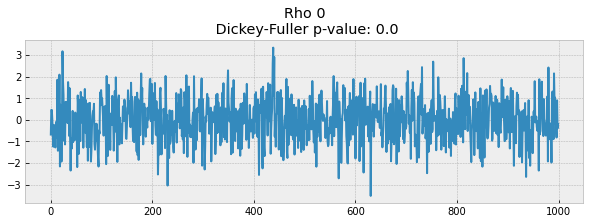

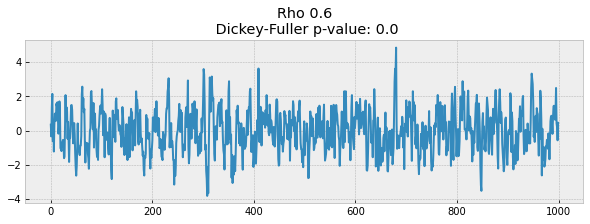

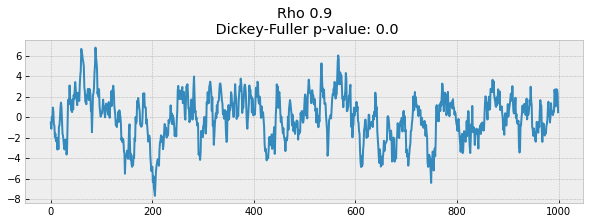

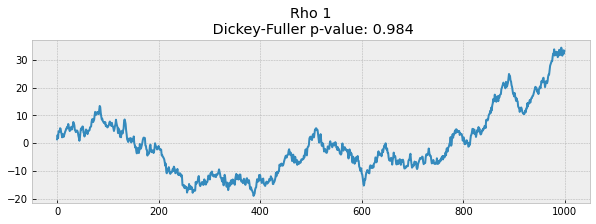

In [86]:
def plotProcess(n_samples=1000, rho=0):
    x = w = np.random.normal(size=n_samples)
    for t in range(n_samples):
        x[t] = rho * x[t-1] + w[t]

    with plt.style.context('bmh'):  
        plt.figure(figsize=(10, 3))
        plt.plot(x)
        plt.title("Rho {}\n Dickey-Fuller p-value: {}".format(rho, round(sm.tsa.stattools.adfuller(x)[1], 3)))
        
for rho in [0, 0.6, 0.9, 1]:
    plotProcess(rho=rho)

On the first plot, you can see the same stationary white noise as before. On the second plot with  ρ  increased to 0.6, wider cycles appeared, but it still appears stationary overall. The third plot deviates even more from the 0 mean but still oscillates about the mean. Finally, with  ρ=1 , we have a random walk process i.e. a non-stationary time series.

This happens because, after reaching the critical value, the series  xt=ρxt−1+et  does not return to its mean value. If we subtract  xt−1  from both sides, we will get  xt−xt−1=(ρ−1)xt−1+et , where the expression on the left is referred to as the first difference. If  ρ=1 , then the first difference gives us stationary white noise  et . This is the main idea behind the Dickey-Fuller test for stationarity of time series (testing the presence of a unit root). If we can get a stationary series from a non-stationary series using the first difference, we call those series integrated of order 1. The null hypothesis of the test is that the time series is non-stationary, which was rejected on the first three plots and finally accepted on the last one. We have to say that the first difference is not always enough to get a stationary series as the process might be integrated of order d, d > 1 (and have multiple unit roots). In such cases, the augmented Dickey-Fuller test is used, which checks multiple lags at once.

We can fight non-stationarity using different approaches: various order differences, trend and seasonality removal, smoothing, and transformations like Box-Cox or logarithmic.

## Getting rid of non-stationarity and building SARIMA


Let's build an ARIMA model by walking through all the circles of hell stages of making a series stationary.

Here is the code to render plots.

In [87]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

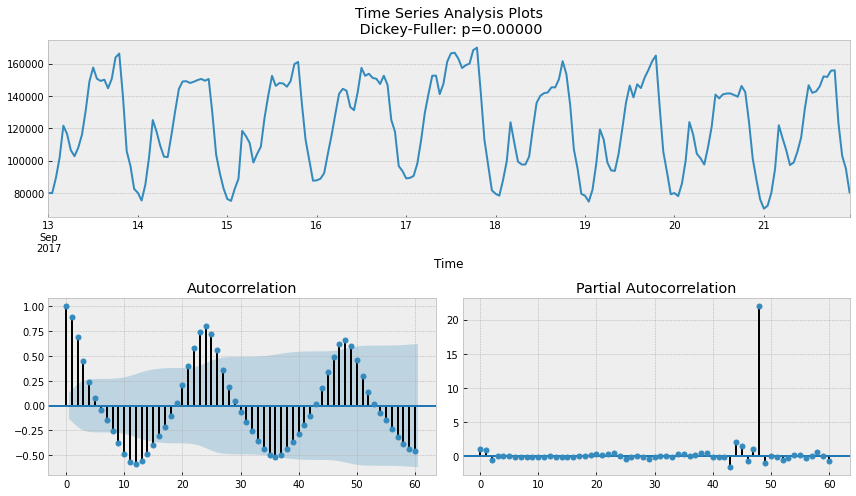

In [88]:
tsplot(ads.Ads, lags=60)


Surprisingly, the initial series are stationary; the Dickey-Fuller test rejected the null hypothesis that a unit root is present. Actually, we can see this on the plot itself -- we do not have a visible trend, so the mean is constant and the variance is pretty much stable. The only thing left is seasonality, which we have to deal with prior to modeling. To do so, let's take the "seasonal difference", which means a simple subtraction of the series from itself with a lag that equals the seasonal period.

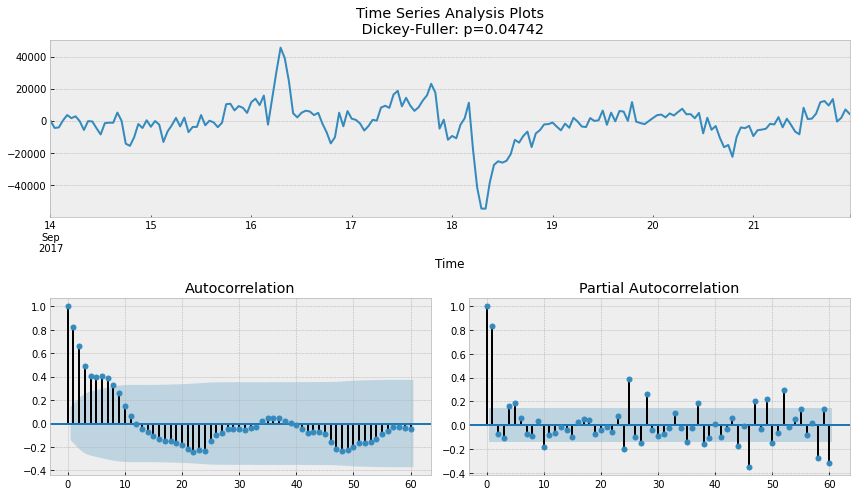

In [89]:
ads_diff = ads.Ads - ads.Ads.shift(24)
tsplot(ads_diff[24:], lags=60)

It is now much better with the visible seasonality gone. However, the autocorrelation function still has too many significant lags. To remove them, we'll take first differences, subtracting the series from itself with lag 1.

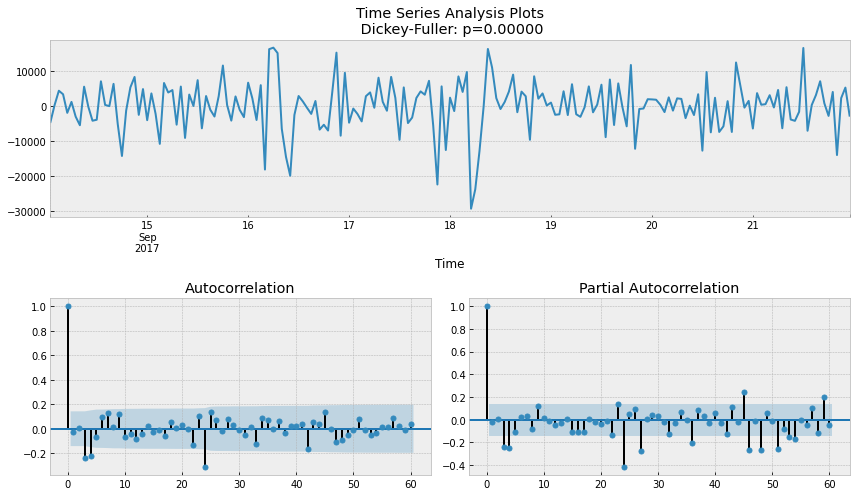

In [90]:
ads_diff = ads_diff - ads_diff.shift(1)
tsplot(ads_diff[24+1:], lags=60)

Perfect! Our series now looks like something undescribable, oscillating around zero. The Dickey-Fuller test indicates that it is stationary, and the number of significant peaks in ACF has dropped. We can finally start modeling!

## ARIMA-family Crash-Course

We will explain this model by building up letter by letter. $SARIMA(p, d, q)(P, D, Q, s)$, Seasonal Autoregression Moving Average model:

- $AR(p)$ - autoregression model i.e. regression of the time series onto itself. The basic assumption is that the current series values depend on its previous values with some lag (or several lags). The maximum lag in the model is referred to as $p$. To determine the initial $p$, you need to look at the PACF plot and find the biggest significant lag after which **most** other lags become insignificant.
- $MA(q)$ - moving average model. Without going into too much detail, this models the error of the time series, again with the assumption that the current error depends on the previous with some lag, which is referred to as $q$. The initial value can be found on the ACF plot with the same logic as before. 

Let's combine our first 4 letters:

$AR(p) + MA(q) = ARMA(p, q)$

What we have here is the Autoregressive–moving-average model! If the series is stationary, it can be approximated with these 4 letters. Let's continue.

- $I(d)$ - order of integration. This is simply the number of nonseasonal differences needed to make the series stationary. In our case, it's just 1 because we used first differences. 

Adding this letter to the four gives us the $ARIMA$ model which can handle non-stationary data with the help of nonseasonal differences. Great, one more letter to go!

- $S(s)$ - this is responsible for seasonality and equals the season period length of the series

With this, we have three parameters: $(P, D, Q)$

- $P$ - order of autoregression for the seasonal component of the model, which can be derived from PACF. But you need to look at the number of significant lags, which are the multiples of the season period length. For example, if the period equals 24 and we see the 24-th and 48-th lags are significant in the PACF, that means the initial $P$ should be 2.

- $Q$ - similar logic using the ACF plot instead.

- $D$ - order of seasonal integration. This can be equal to 1 or 0, depending on whether seasonal differeces were applied or not.

Now that we know how to set the initial parameters, let's have a look at the final plot once again and set the parameters:


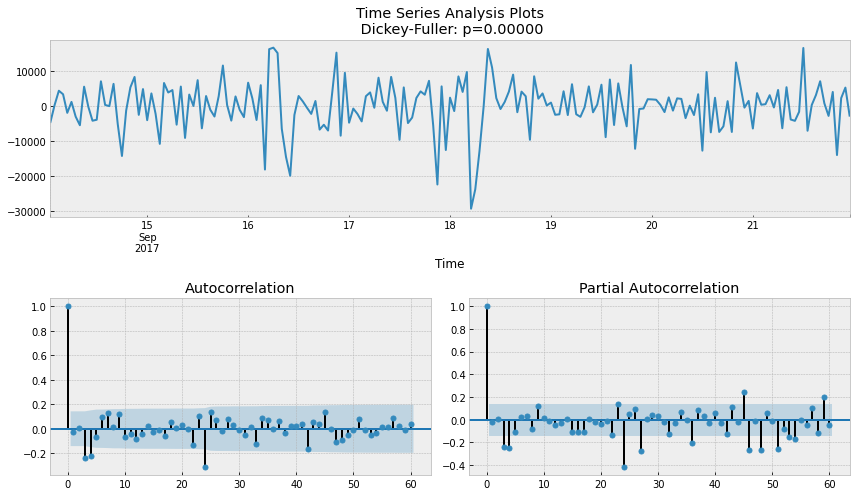

In [91]:
tsplot(ads_diff[24+1:], lags=60)


- $p$ is most probably 4 since it is the last significant lag on the PACF, after which, most others are not significant. 
- $d$ equals 1 because we had first differences
- $q$ should be somewhere around 4 as well as seen on the ACF
- $P$ might be 2, since 24-th and 48-th lags are somewhat significant on the PACF
- $D$ again equals 1 because we performed seasonal differentiation
- $Q$ is probably 1. The 24-th lag on ACF is significant while the 48-th is not.

Let's test various models and see which one is better.



In [92]:
# setting initial values and some bounds for them
ps = range(2, 5)
d=1 
qs = range(2, 5)
Ps = range(0, 2)
D=1 
Qs = range(0, 2)
s = 24 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

36

In [93]:
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(ads.Ads, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [94]:
%%time
result_table = optimizeSARIMA(parameters_list, d, D, s)



CPU times: user 12min 22s, sys: 12.7 s, total: 12min 34s
Wall time: 7min 35s


In [95]:
result_table.head()

parameters          aic
0  (2, 3, 1, 1)  3888.642174
1  (3, 2, 1, 1)  3888.763568
2  (4, 2, 1, 1)  3890.279740
3  (3, 3, 1, 1)  3890.513196
4  (2, 4, 1, 1)  3892.302849

* The basic idea of AIC is to penalize the inclusion of additional variables to a model. It adds a penalty that increases the error when including additional terms. The lower the AIC, the better the model.


### Multiple Cross Validation

Observations: 108
Training Observations: 54
Testing Observations: 54
Observations: 162
Training Observations: 108
Testing Observations: 54
Observations: 216
Training Observations: 162
Testing Observations: 54


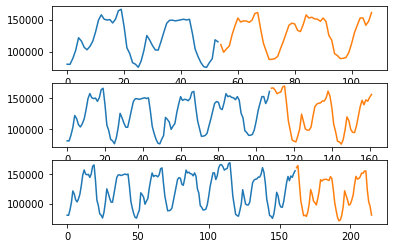

In [96]:

from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot
series = ads
X = series.values
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))
	pyplot.subplot(310 + index)
	pyplot.plot(train)
	pyplot.plot([None for i in train] + [x for x in test])
	index += 1
pyplot.show()

* aqui esta fazendo o grid search com a serie interira e depois fazendo o fit com os melhores parametros
na serie inteira e depois o predict na serie interia 

In [97]:
# set the parameters that give the lowest AIC
p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(ads.Ads, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                  Ads   No. Observations:                  216
Model:             SARIMAX(2, 1, 3)x(1, 1, [1], 24)   Log Likelihood               -1936.321
Date:                              Wed, 15 Jul 2020   AIC                           3888.642
Time:                                      22:57:20   BIC                           3914.660
Sample:                                  09-13-2017   HQIC                          3899.181
                                       - 09-21-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7913      0.270      2.928      0.003       0.262       1.321
ar.L2         -0.55

Let's inspect the residuals of the model.


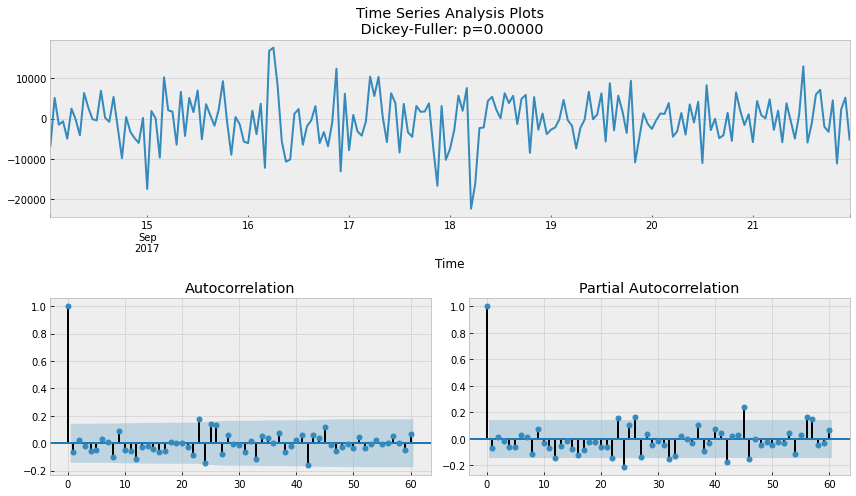

In [98]:
tsplot(best_model.resid[24+1:], lags=60)

It is clear that the residuals are stationary, and there are no apparent autocorrelations. Let's make predictions using our model.



In [155]:
def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
#     # making a shift on s+d steps, because these values were unobserved by the model
#     # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    
#     print(type(data.arima_model))
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
#     forecast = data.arima_model.append(forecast)
#     # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

#     plt.figure(figsize=(15, 7))
#     plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
#     plt.plot(forecast, color='r', label="model")
#     plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
#     plt.plot(data.actual, label="actual")
#     plt.legend()
#     plt.grid(True);

In [137]:
type(ads.Ads)

pandas.core.series.Series

                     actual    arima_model
Time                                      
2017-09-13 00:00:00   80115            NaN
2017-09-13 01:00:00   79885            NaN
2017-09-13 02:00:00   89325            NaN
2017-09-13 03:00:00  101930            NaN
2017-09-13 04:00:00  121630            NaN
...                     ...            ...
2017-09-21 19:00:00  155890  151394.104411
2017-09-21 20:00:00  123395  134501.828390
2017-09-21 21:00:00  103080  100789.282777
2017-09-21 22:00:00   95155   89956.557812
2017-09-21 23:00:00   80285   85489.050364

[216 rows x 2 columns]


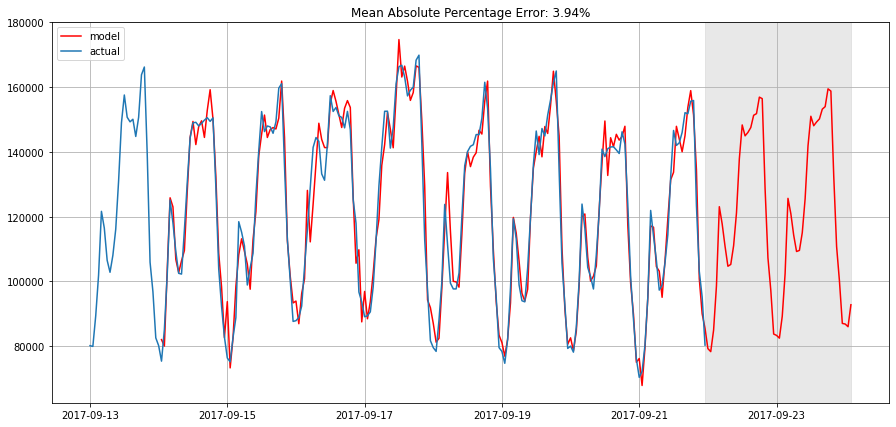

In [100]:
plotSARIMA(ads, best_model, 50)

####  Usando  Cross Validation

In [153]:
def multipleCV(series, n_splits, result_table ):
    p, q, P, Q = result_table.parameters[0]

#     series = ads
    X = series.values
    splits = TimeSeriesSplit(n_splits=3)
#     pyplot.figure(1)
    index = 1
    for train_index, test_index in splits.split(X):
        train = X[train_index]
        test = X[test_index]
        print('Observations: %d' % (len(train) + len(test)))
        print('Training Observations: %d' % (len(train)))
        print('Testing Observations: %d' % (len(test)))
        # chamar o modelo para train e teste com os parametros que ja foram selecionados 

        train = pd.DataFrame(train)
        train = train.rename(columns = {0:'ads'})
        test = pd.DataFrame(test)
        test = test.rename(columns = {0:'ads'})
        
        best_model=sm.tsa.statespace.SARIMAX(train.ads, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
            
#         print(type(test))
        plotSARIMA(test, best_model, 50)
#         print(type(best_model))
#         # chamar o gridSearch aqui 
        
#         pyplot.subplot(310 + index)
#         pyplot.plot(train)
#         pyplot.plot([None for i in train] + [x for x in test])
#         index += 1
#     pyplot.show()

In [156]:
multipleCV(ads, 3, result_table)

Observations: 108
Training Observations: 54
Testing Observations: 54
Observations: 162
Training Observations: 108
Testing Observations: 54
Observations: 216
Training Observations: 162
Testing Observations: 54


In the end, we got very adequate predictions. Our model was wrong by 4.01% on average, which is very, very good. However, the overall costs of preparing data, making the series stationary, and selecting parameters might not be worth this accuracy.

# Linear (and not quite) models on time series

Often, in my job, I have to build models with fast, good, cheap as my only guiding principle. That means that some of these models will never be considered "production ready" as they demand too much time for data preparation (as in SARIMA) or require frequent re-training on new data (again, SARIMA) or are difficult to tune (good example - SARIMA). Therefore, it's very often much easier to select a few features from the existing time series and build a simple linear regression model or, say, a random forest. It is good and cheap.

This approach is not backed by theory and breaks several assumptions (e.g. Gauss-Markov theorem, especially for errors being uncorrelated), but it is very useful in practice and is often used in machine learning competitions.

## Feature exctraction

The model needs features, and all we have is a 1-dimentional time series. What features can we exctract?

Lags of time series
Window statistics:
Max/min value of series in a window
Average/median value in a window
Window variance
etc.
Date and time features:
Minute of an hour, hour of a day, day of the week, and so on
Is this day a holiday? Maybe there is a special event? Represent that as a boolean feature
Target encoding
Forecasts from other models (note that we can lose the speed of prediction this way)

Let's run through some of the methods and see what we can extract from our ads time series data.



## Lags of time series

Shifting the series  n  steps back, we get a feature column where the current value of time series is aligned with its value at time  t−n . If we make a 1 lag shift and train a model on that feature, the model will be able to forecast 1 step ahead from having observed the current state of the series. Increasing the lag, say, up to 6, will allow the model to make predictions 6 steps ahead; however it will use data observed 6 steps back. If something fundamentally changes the series during that unobserved period, the model will not catch these changes and will return forecasts with a large error. Therefore, during the initial lag selection, one has to find a balance between the optimal prediction quality and the length of the forecasting horizon.

In [46]:
# Creating a copy of the initial datagrame to make various transformations 
data = pd.DataFrame(ads.Ads.copy())
data.columns = ["y"]

In [66]:
# Adding the lag of the target variable from 6 steps back up to 24
for i in range(6, 25):
    data["lag_{}".format(i)] = data.y.shift(i)

In [67]:
data.head()

y  lag_6  lag_7  lag_8  lag_9  lag_10  lag_11  \
Time                                                                      
2017-09-13 00:00:00   80115    NaN    NaN    NaN    NaN     NaN     NaN   
2017-09-13 01:00:00   79885    NaN    NaN    NaN    NaN     NaN     NaN   
2017-09-13 02:00:00   89325    NaN    NaN    NaN    NaN     NaN     NaN   
2017-09-13 03:00:00  101930    NaN    NaN    NaN    NaN     NaN     NaN   
2017-09-13 04:00:00  121630    NaN    NaN    NaN    NaN     NaN     NaN   

                     lag_12  lag_13  lag_14  lag_15  lag_16  lag_17  lag_18  \
Time                                                                          
2017-09-13 00:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2017-09-13 01:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2017-09-13 02:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2017-09-13 03:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2017-09-13 04:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

                     lag_19  lag_20  lag_21  lag_22  lag_23  lag_24  
Time                                                                 
2017-09-13 00:00:00     NaN     NaN     NaN     NaN     NaN     NaN  
2017-09-13 01:00:00     NaN     NaN     NaN     NaN     NaN     NaN  
2017-09-13 02:00:00     NaN     NaN     NaN     NaN     NaN     NaN  
2017-09-13 03:00:00     NaN     NaN     NaN     NaN     NaN     NaN  
2017-09-13 04:00:00     NaN     NaN     NaN     NaN     NaN     NaN

In [69]:
# take a look at the new dataframe 
data.tail(7)


y     lag_6     lag_7     lag_8     lag_9    lag_10  \
Time                                                                            
2017-09-21 14:00:00  142815   98860.0   97290.0  106495.0  113950.0  121910.0   
2017-09-21 15:00:00  146020  105635.0   98860.0   97290.0  106495.0  113950.0   
2017-09-21 16:00:00  152120  114380.0  105635.0   98860.0   97290.0  106495.0   
2017-09-21 17:00:00  151790  132335.0  114380.0  105635.0   98860.0   97290.0   
2017-09-21 18:00:00  155665  146630.0  132335.0  114380.0  105635.0   98860.0   
2017-09-21 19:00:00  155890  141995.0  146630.0  132335.0  114380.0  105635.0   
2017-09-21 20:00:00  123395  142815.0  141995.0  146630.0  132335.0  114380.0   
2017-09-21 21:00:00  103080  146020.0  142815.0  141995.0  146630.0  132335.0   
2017-09-21 22:00:00   95155  152120.0  146020.0  142815.0  141995.0  146630.0   
2017-09-21 23:00:00   80285  151790.0  152120.0  146020.0  142815.0  141995.0   

                       lag_11    lag_12    lag_13    lag_14    lag_15  \
Time                                                                    
2017-09-21 14:00:00   94945.0   80195.0   72150.0   70335.0   76050.0   
2017-09-21 15:00:00  121910.0   94945.0   80195.0   72150.0   70335.0   
2017-09-21 16:00:00  113950.0  121910.0   94945.0   80195.0   72150.0   
2017-09-21 17:00:00  106495.0  113950.0  121910.0   94945.0   80195.0   
2017-09-21 18:00:00   97290.0  106495.0  113950.0  121910.0   94945.0   
2017-09-21 19:00:00   98860.0   97290.0  106495.0  113950.0  121910.0   
2017-09-21 20:00:00  105635.0   98860.0   97290.0  106495.0  113950.0   
2017-09-21 21:00:00  114380.0  105635.0   98860.0   97290.0  106495.0   
2017-09-21 22:00:00  132335.0  114380.0  105635.0   98860.0   97290.0   
2017-09-21 23:00:00  146630.0  132335.0  114380.0  105635.0   98860.0   

                       lag_16    lag_17    lag_18    lag_19    lag_20  \
Time                                                                    
2017-09-21 14:00:00   88170.0  101360.0  123945.0  142425.0  146215.0   
2017-09-21 15:00:00   76050.0   88170.0  101360.0  123945.0  142425.0   
2017-09-21 16:00:00   70335.0   76050.0   88170.0  101360.0  123945.0   
2017-09-21 17:00:00   72150.0   70335.0   76050.0   88170.0  101360.0   
2017-09-21 18:00:00   80195.0   72150.0   70335.0   76050.0   88170.0   
2017-09-21 19:00:00   94945.0   80195.0   72150.0   70335.0   76050.0   
2017-09-21 20:00:00  121910.0   94945.0   80195.0   72150.0   70335.0   
2017-09-21 21:00:00  113950.0  121910.0   94945.0   80195.0   72150.0   
2017-09-21 22:00:00  106495.0  113950.0  121910.0   94945.0   80195.0   
2017-09-21 23:00:00   97290.0  106495.0  113950.0  121910.0   94945.0   

                       lag_21    lag_22    lag_23    lag_24  
Time                                                         
2017-09-21 14:00:00  139515.0  140610.0  141590.0  141525.0  
2017-09-21 15:00:00  146215.0  139515.0  140610.0  141590.0  
2017-09-21 16:00:00  142425.0  146215.0  139515.0  140610.0  
2017-09-21 17:00:00  123945.0  142425.0  146215.0  139515.0  
2017-09-21 18:00:00  101360.0  123945.0  142425.0  146215.0  
2017-09-21 19:00:00   88170.0  101360.0  123945.0  142425.0  
2017-09-21 20:00:00   76050.0   88170.0  101360.0  123945.0  
2017-09-21 21:00:00   70335.0   76050.0   88170.0  101360.0  
2017-09-21 22:00:00   72150.0   70335.0   76050.0   88170.0  
2017-09-21 23:00:00   80195.0   72150.0   70335.0   76050.0

Great, we have generated a dataset here. Why don't we now train a model?


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

In [71]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [72]:
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [73]:
# machine learning in two lines
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

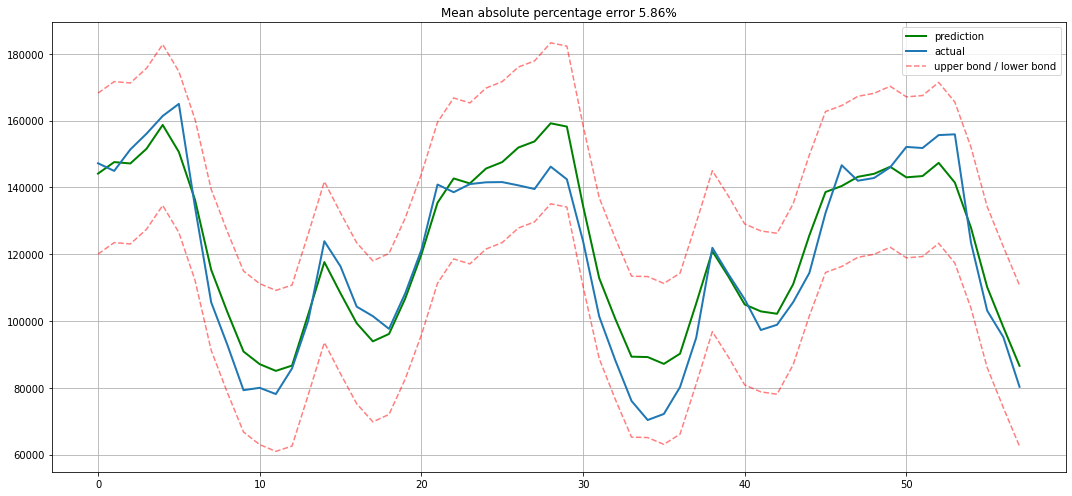

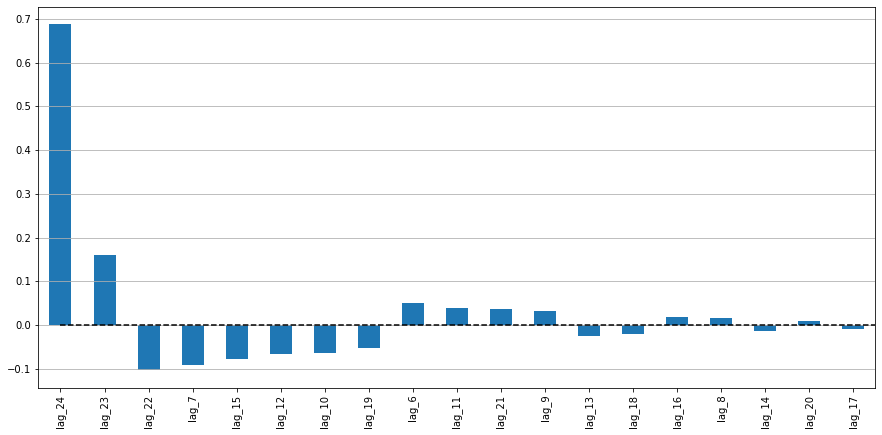

In [75]:
plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)

Simple lags and linear regression gave us predictions that are not that far off from SARIMA in terms of quality. There are many unnecessary features, so we'll do feature selection in a little while. For now, let's continue engineering!

We'll add hour, day of week, and a boolean for is_weekend. To do so, we need to transform the current dataframe index into the datetime format and extract hour and weekday.

In [76]:
data.index = pd.to_datetime(data.index)
data["hour"] = data.index.hour
data["weekday"] = data.index.weekday
data['is_weekend'] = data.weekday.isin([5,6])*1
data.tail()

y     lag_6     lag_7     lag_8     lag_9    lag_10  \
Time                                                                            
2017-09-21 19:00:00  155890  141995.0  146630.0  132335.0  114380.0  105635.0   
2017-09-21 20:00:00  123395  142815.0  141995.0  146630.0  132335.0  114380.0   
2017-09-21 21:00:00  103080  146020.0  142815.0  141995.0  146630.0  132335.0   
2017-09-21 22:00:00   95155  152120.0  146020.0  142815.0  141995.0  146630.0   
2017-09-21 23:00:00   80285  151790.0  152120.0  146020.0  142815.0  141995.0   

                       lag_11    lag_12    lag_13    lag_14  ...    lag_18  \
Time                                                         ...             
2017-09-21 19:00:00   98860.0   97290.0  106495.0  113950.0  ...   72150.0   
2017-09-21 20:00:00  105635.0   98860.0   97290.0  106495.0  ...   80195.0   
2017-09-21 21:00:00  114380.0  105635.0   98860.0   97290.0  ...   94945.0   
2017-09-21 22:00:00  132335.0  114380.0  105635.0   98860.0  ...  121910.0   
2017-09-21 23:00:00  146630.0  132335.0  114380.0  105635.0  ...  113950.0   

                       lag_19   lag_20   lag_21    lag_22    lag_23    lag_24  \
Time                                                                            
2017-09-21 19:00:00   70335.0  76050.0  88170.0  101360.0  123945.0  142425.0   
2017-09-21 20:00:00   72150.0  70335.0  76050.0   88170.0  101360.0  123945.0   
2017-09-21 21:00:00   80195.0  72150.0  70335.0   76050.0   88170.0  101360.0   
2017-09-21 22:00:00   94945.0  80195.0  72150.0   70335.0   76050.0   88170.0   
2017-09-21 23:00:00  121910.0  94945.0  80195.0   72150.0   70335.0   76050.0   

                     hour  weekday  is_weekend  
Time                                            
2017-09-21 19:00:00    19        3           0  
2017-09-21 20:00:00    20        3           0  
2017-09-21 21:00:00    21        3           0  
2017-09-21 22:00:00    22        3           0  
2017-09-21 23:00:00    23        3           0  

[5 rows x 23 columns]

We can visualize the resulting features.


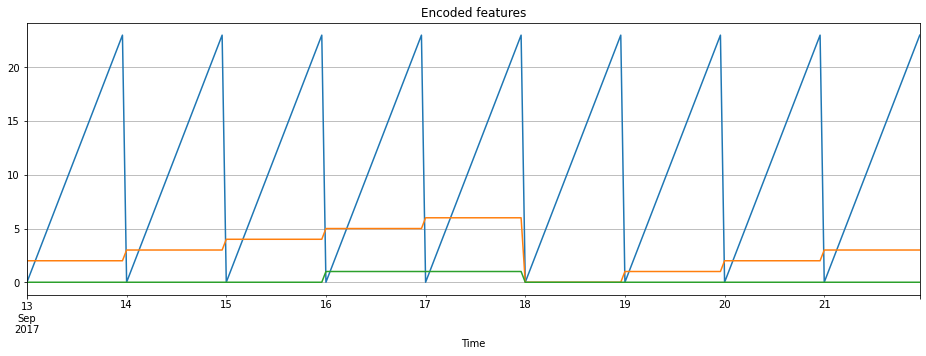

In [77]:
plt.figure(figsize=(16, 5))
plt.title("Encoded features")
data.hour.plot()
data.weekday.plot()
data.is_weekend.plot()
plt.grid(True);

Since we now have different scales in our variables, thousands for the lag features and tens for categorical, we need to transform them into same scale for exploring feature importance and, later, regularization.

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

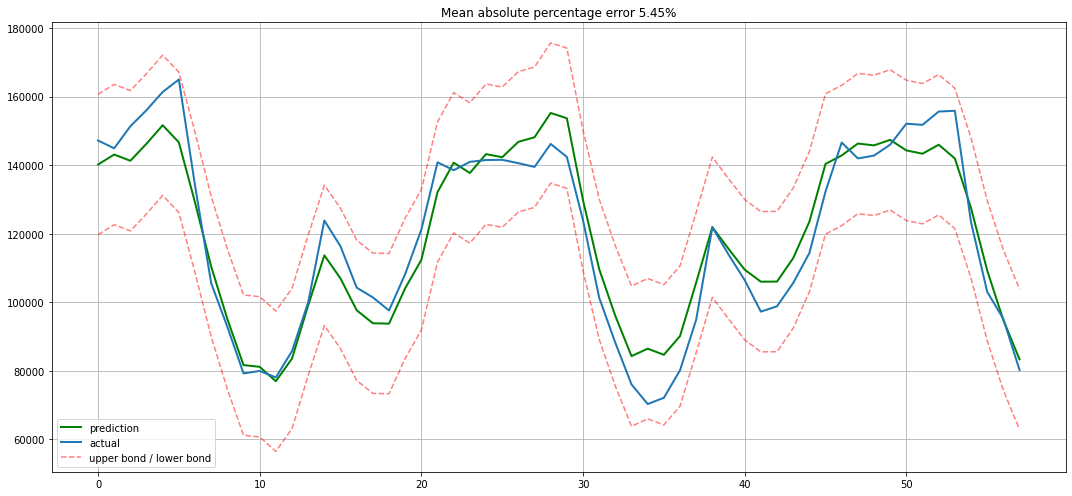

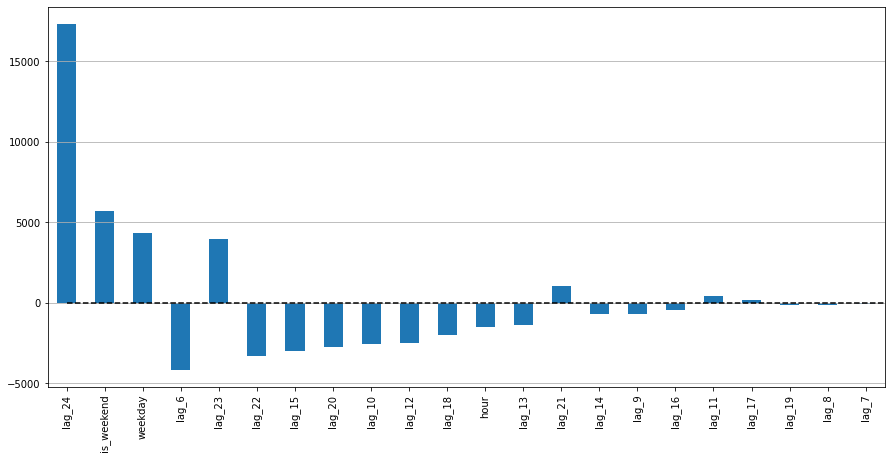

In [84]:
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True)
plotCoefficients(lr)

The test error goes down a little bit. Judging by the coefficients plot, we can say that weekday and is_weekend are useful features.



## Target encoding

I'd like to add another variant for encoding categorical variables: encoding by mean value. If it is undesirable to explode a dataset by using many dummy variables that can lead to the loss of information and if they cannot be used as real values because of the conflicts like "0 hours < 23 hours", then it's possible to encode a variable with slightly more interpretable values. The natural idea is to encode with the mean value of the target variable. In our example, every day of the week and every hour of the day can be encoded by the corresponding average number of ads watched during that day or hour. It's very important to make sure that the mean value is calculated over the training set only (or over the current cross-validation fold only) so that the model is not aware of the future.

In [85]:
def code_mean(data, cat_feature, real_feature):
    """
    Returns a dictionary where keys are unique categories of the cat_feature,
    and values are means over real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

Vamos ver a media por hora

In [87]:
code_mean(data, 'hour', "y")

{0: 80178.88888888889,
 1: 79091.11111111111,
 2: 86223.33333333333,
 3: 98695.0,
 4: 120291.11111111111,
 5: 118093.33333333333,
 6: 113172.77777777778,
 7: 110168.33333333333,
 8: 110902.22222222222,
 9: 115071.11111111111,
 10: 126923.33333333333,
 11: 142477.77777777778,
 12: 150500.0,
 13: 147700.0,
 14: 148446.11111111112,
 15: 148116.66666666666,
 16: 148832.77777777778,
 17: 150643.88888888888,
 18: 157628.88888888888,
 19: 156817.22222222222,
 20: 132030.55555555556,
 21: 107847.22222222222,
 22: 94936.11111111111,
 23: 82589.44444444444}

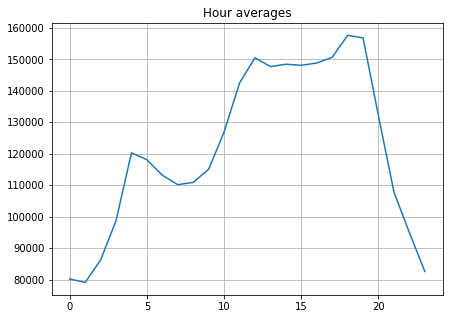

In [86]:
average_hour = code_mean(data, 'hour', "y")
plt.figure(figsize=(7, 5))
plt.title("Hour averages")
pd.DataFrame.from_dict(average_hour, orient='index')[0].plot()
plt.grid(True);



Finalmente, vamos colocar todas as transformações juntas em uma função


In [88]:
def prepareData(series, lag_start, lag_end, test_size, target_encoding=False):
    """
        series: pd.DataFrame
            dataframe with timeseries

        lag_start: int
            initial step back in time to slice target variable 
            example - lag_start = 1 means that the model 
                      will see yesterday's values to predict today

        lag_end: int
            final step back in time to slice target variable
            example - lag_end = 4 means that the model 
                      will see up to 4 days back in time to predict today

        test_size: float
            size of the test dataset after train/test split as percentage of dataset

        target_encoding: boolean
            if True - add target averages to the dataset
        
    """
    
    # copy of the initial dataset
    data = pd.DataFrame(series.copy())
    data.columns = ["y"]
    
    # lags of series
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)
    
    # datetime features
    data.index = pd.to_datetime(data.index)
    data["hour"] = data.index.hour
    data["weekday"] = data.index.weekday
    data['is_weekend'] = data.weekday.isin([5,6])*1
    
    if target_encoding:
        # calculate averages on train set only
        test_index = int(len(data.dropna())*(1-test_size))
        data['weekday_average'] = list(map(code_mean(data[:test_index], 'weekday', "y").get, data.weekday))
        data["hour_average"] = list(map(code_mean(data[:test_index], 'hour', "y").get, data.hour))

        # frop encoded variables 
        data.drop(["hour", "weekday"], axis=1, inplace=True)
    
    # train-test split
    y = data.dropna().y
    X = data.dropna().drop(['y'], axis=1)
    X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=test_size)

    return X_train, X_test, y_train, y_test

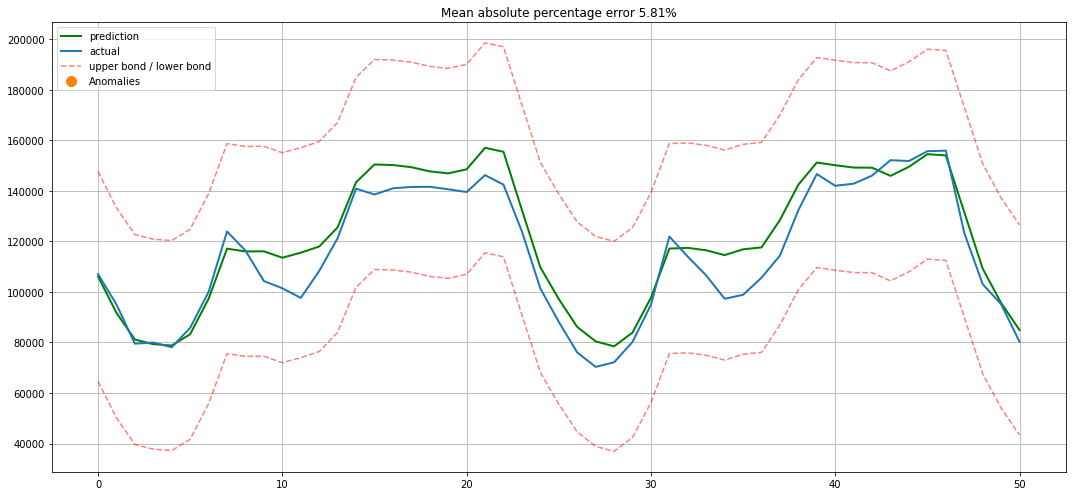

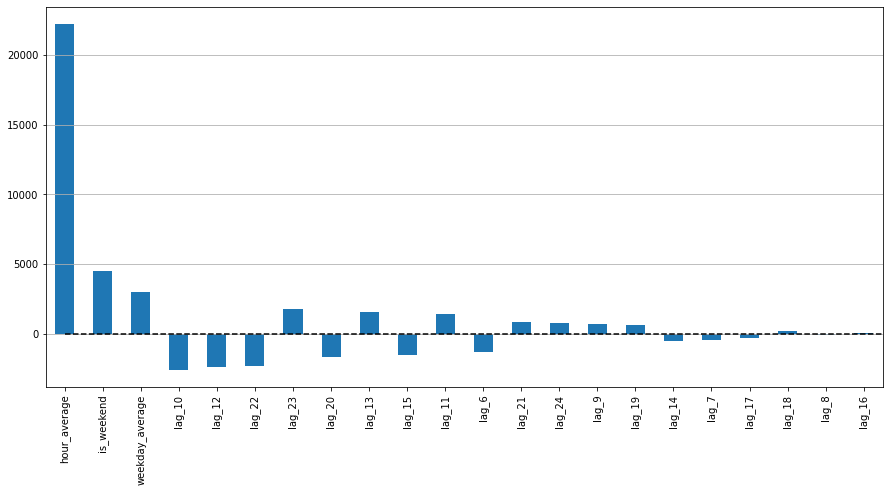

In [89]:
X_train, X_test, y_train, y_test = prepareData(ads.Ads, lag_start=6, lag_end=25, test_size=0.3, target_encoding=True)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True, plot_anomalies=True)
plotCoefficients(lr)

We see some overfitting! Hour_average was so great in the training dataset that the model decided to concentrate all of its forces on it. As a result, the quality of prediction dropped. This problem can be solved in a variety of ways; for example, we can calculate the target encoding not for the whole train set, but for some window instead. That way, encodings from the last observed window will most likely better describe the current series state. Alternatively, we can just drop it manually since we are sure that it makes things only worse in this case.

In [90]:
X_train, X_test, y_train, y_test =\
prepareData(ads.Ads, lag_start=6, lag_end=25, test_size=0.3, target_encoding=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Regularization and feature selection
As we already know, not all features are equally healthy -- some may lead to overfitting while others should be removed. Besides manual inspection, we can apply regularization. Two of the most popular regression models with regularization are Ridge and Lasso regressions. They both add some more constrains to our loss function.

In the case of Ridge regression, those constraints are the sum of squares of the coefficients multiplied by the regularization coefficient. The bigger the coefficient a feature has, the bigger our loss will be. Hence, we will try to optimize the model while keeping the coefficients fairly low.

As a result of this  L2  regularization, we will have higher bias and lower variance, so the model will generalize better (at least that's what we hope will happen).

The second regression model, Lasso regression, adds to the loss function, not squares, but absolute values of the coefficients. As a result, during the optimization process, coefficients of unimportant features may become zeroes, which allows for automated feature selection. This regularization type is called  L1 .

First, let's make sure that we have features to drop and that the data has highly correlated features.

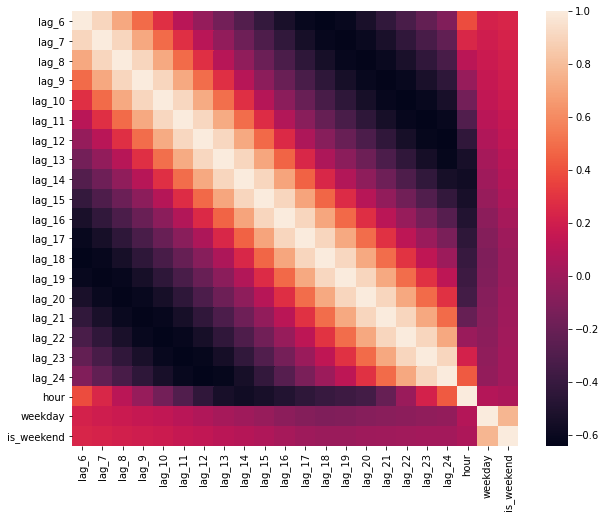

In [92]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr());

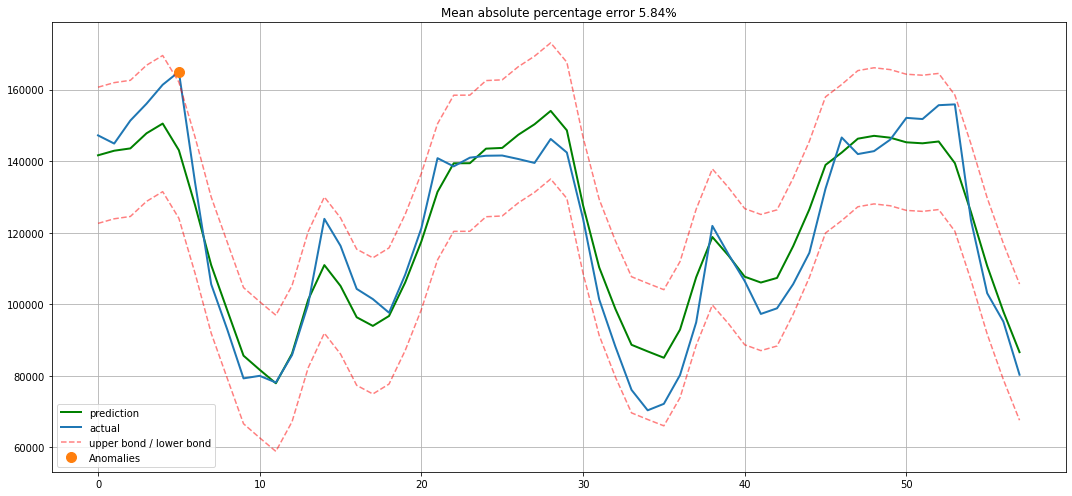

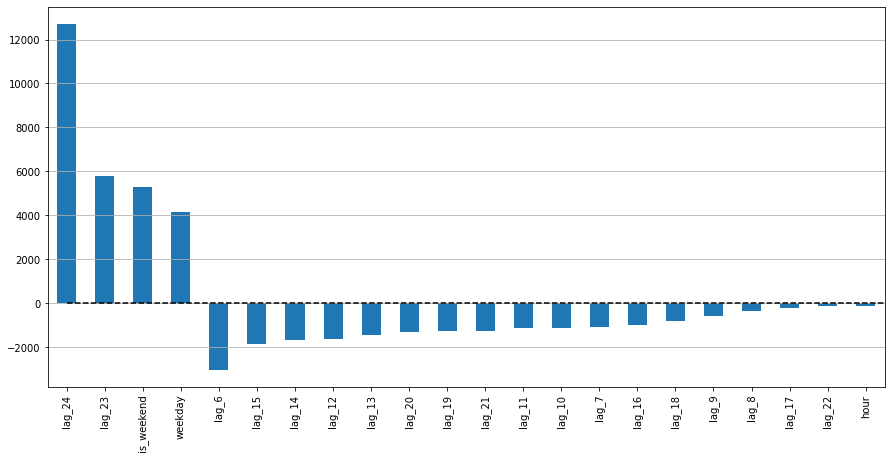

In [93]:
from sklearn.linear_model import LassoCV, RidgeCV

ridge = RidgeCV(cv=tscv)
ridge.fit(X_train_scaled, y_train)

plotModelResults(ridge, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(ridge)

We can clearly see some coefficients are getting closer and closer to zero (though they never actually reach it) as their importance in the model drops.



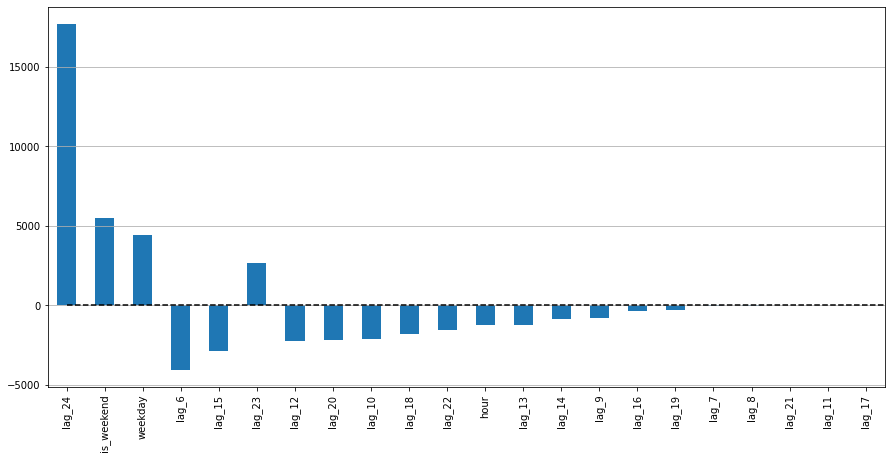

In [94]:
lasso = LassoCV(cv=tscv)
lasso.fit(X_train_scaled, y_train)

plotModelResults(lasso, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(lasso)

Lasso regression turned out to be more conservative; it removed 23-rd lag from the most important features and dropped 5 features completely, which only made the quality of prediction better.

# Boosting
Why shouldn't we try XGBoost now?

In [97]:
#!pip install xgboost

     |████████████████████████████████| 127.6 MB 4.3 kB/s eta 0:00:01    |███████████▊                    | 46.5 MB 6.1 MB/s eta 0:00:14     |██████████████▎                 | 57.1 MB 5.9 MB/s eta 0:00:12     |█████████████████████▉          | 87.2 MB 4.5 MB/s eta 0:00:09     |███████████████████████▎        | 92.8 MB 7.4 MB/s eta 0:00:05     |██████████████████████████▏     | 104.4 MB 5.4 MB/s eta 0:00:05     |█████████████████████████████▋  | 117.9 MB 5.2 MB/s eta 0:00:02


In [98]:
from xgboost import XGBRegressor 

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

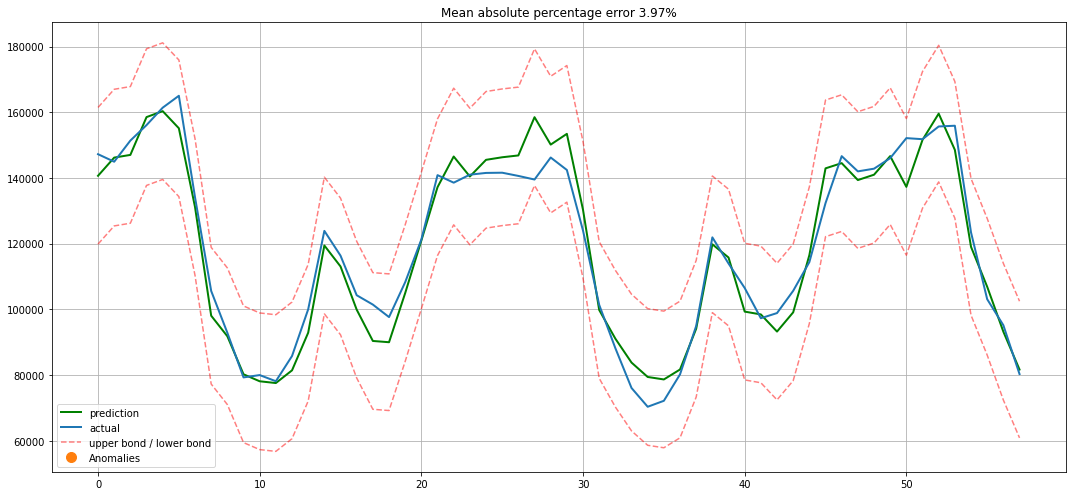

In [99]:
plotModelResults(xgb, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)

We have a winner! This is the smallest error on the test set among all the models we've tried so far.

But, this victory is decieving, and it might not be the brightest idea to fit xgboost as soon as you get your hands on time series data. Generally, tree-based models handle trends in data poorly when compared with linear models. In that case, you would have to detrend your series first or use some tricks to make the magic happen. Ideally, you can make the series stationary and then use XGBoost. For example, you can forecast trend separately with a linear model and then add predictions from xgboost to get a final forecast.

# Conclusion
We discussed different time series analysis and prediction methods. Unfortunately, or maybe luckily, there is no one way to solve these kind of problems. Methods developed in the 1960s (and some even in the beginning of the 21st century) are still popular, along with LSTMs and RNNs (not covered in this article). This is partially related to the fact that the prediction task, like any other data-related task, requires creativity in so many aspects and definitely requires research. In spite of the large number of formal quality metrics and approaches to parameters estimation, it is often necessary to try something different for each time series. Last but not least, the balance between quality and cost is important. As a good example, the SARIMA model can produce spectacular results after tuning but can require many hours of tambourine dancing time series manipulation while a simple linear regression model can be built in 10 minutes and can achieve more or less comparable results.

In [100]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

print(kf)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]
